In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from os import path
import numpy as np
import glob
from tqdm.notebook import tqdm
from scipy.stats import pearsonr, spearmanr

In [27]:
df = pd.read_parquet('../Data/Processed/Lag.parquet').head(100000)

In [28]:
display(df['Data'])

Column,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,...,feature_78_lag,responder_0_lag,responder_1_lag,responder_2_lag,responder_3_lag,responder_4_lag,responder_5_lag,responder_6_lag,responder_7_lag,responder_8_lag
0,0.053447,2.192887,1.160708,-0.009830,11,7,76,-0.819115,1.403962,-0.098782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.029047,0.847413,0.769509,0.009426,11,7,76,-0.677290,2.703819,0.307246,...,-0.385573,-0.022355,0.337951,0.156607,1.406054,3.680800,0.598633,2.337418,2.577889,0.725604
2,0.017732,0.727187,1.153705,-0.005600,11,7,76,-0.587609,3.081821,0.256400,...,-0.302946,-0.434444,0.200921,-0.791932,1.294596,2.638853,-1.767631,2.492198,2.537222,-1.363956
3,0.247528,1.072752,1.534643,-0.041765,11,7,76,-0.658146,1.829260,0.238465,...,-0.330820,-0.295700,0.235713,-0.193250,1.294743,2.952363,-0.636602,1.993902,2.234529,-0.620738
4,-0.024495,-0.506043,0.517926,0.006077,11,7,76,-0.984723,0.849526,0.356314,...,-0.313789,-0.406558,0.358021,-0.161244,1.671854,3.207944,-0.481285,1.864082,2.500172,-0.406635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.893791,1.009763,1.858297,-0.067562,11,7,76,0.825828,5.194200,1.821101,...,-0.184217,0.770269,0.225290,1.606411,0.402601,0.695368,1.338432,-0.082210,0.198078,-0.005024
99996,0.839967,1.721366,2.345088,-0.145082,11,7,76,0.609077,2.963014,1.915203,...,-0.186587,0.625895,0.241960,0.699081,0.872467,0.393047,1.252296,0.074832,0.472056,0.194462
99997,0.569094,-0.106503,2.069700,-0.095398,11,7,76,0.835574,1.613150,1.402337,...,-0.230161,0.511949,-0.228022,0.921758,0.537282,-0.237707,0.687065,0.170442,0.043320,0.401081
99998,0.740269,-0.425729,1.266702,-0.058291,11,7,76,0.790890,0.516594,1.231504,...,-0.262621,0.019188,-0.272173,-0.262273,-0.009857,-0.438214,-0.144512,-0.071840,-0.135238,0.165926


In [4]:
glob.glob('../Data/Processed/Predictions/Lag/*')

['../Data/Processed/Predictions/Lag/LinearRegressor.parquet',
 '../Data/Processed/Predictions/Lag/PytorchNeuralNetworkRegressor.parquet']

In [17]:
input_df = pd.read_parquet('../Data/Processed/Predictions/Lag/LinearRegressor.parquet')

In [12]:
figsize=8
label_column = 'responder_6'
alpha=0.5
point_size=5

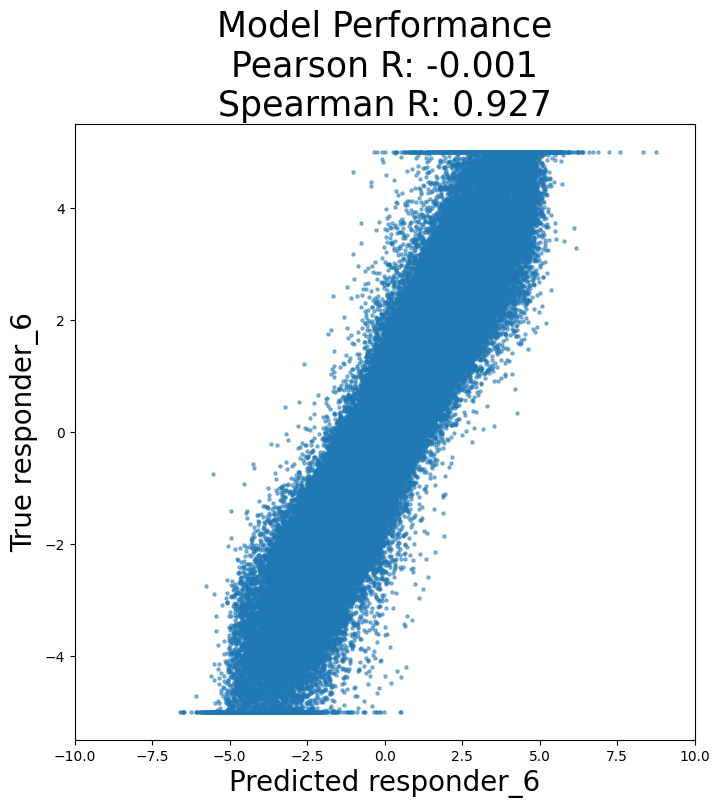

In [22]:
plt.figure(figsize=(figsize,figsize))
plt.scatter(input_df[('Predictions','Prediction')],input_df[('Label',label_column)],alpha=alpha,s=point_size)
pr = np.round(pearsonr(input_df[('Predictions','Prediction')],input_df[('Label',label_column)]).statistic,3)
sr = np.round(spearmanr(input_df[('Predictions','Prediction')],input_df[('Label',label_column)]).statistic,3)
plt.xlabel(f'Predicted {label_column}',fontsize=20)
plt.ylabel(f'True {label_column}',fontsize=20)
plt.title(f'Model Performance\nPearson R: {pr}\nSpearman R: {sr}',fontsize=25)
plt.xlim([-10,10])
# out_filename = path.join(args.output,'scatter.png')
plt.show()
# plt.savefig(out_filename, bbox_inches='tight')

In [19]:
display(input_df['Key'])

Column,date_id,time_id,symbol_id,date_id_lag,time_id_lag,symbol_id_lag
0,1,0,0,0,0,0
1,1,1,0,1,0,0
2,1,2,0,1,1,0
3,1,3,0,1,2,0
4,1,4,0,1,3,0
...,...,...,...,...,...,...
1944205,169,844,38,169,843,38
1944206,169,845,38,169,844,38
1944207,169,846,38,169,845,38
1944208,169,847,38,169,846,38


In [18]:
display(input_df.sort_values([('Predictions','Prediction')]))

Category     Key                                                          \
Column   date_id time_id symbol_id date_id_lag time_id_lag symbol_id_lag   
1613949       20       0        30         169         848            19   
1810917        1       0        38         169         848            34   
1405944        4       0        17         169         848            16   
965313         3       0        12         168         848            11   
906732        13       0        11         169         848            10   
...          ...     ...       ...         ...         ...           ...   
556944         4       0         8         169         848             7   
355731         2       0         3         169         848             2   
1474713        0       0        19         169         848            17   
1634325        0       0        33         169         848            30   
1187751        0       0        14         169         848            13   

Category   Predictions       Label  
Column      Prediction responder_6  
1613949  -1.178736e+10    0.093306  
1810917  -8.250649e+09   -2.290844  
1405944  -6.786653e+09    0.829046  
965313   -3.363836e+09    1.785798  
906732   -2.466537e+09   -0.037502  
...                ...         ...  
556944    2.979039e+08   -0.866926  
355731    1.281711e+09   -1.232622  
1474713   8.244067e+09   -0.807892  
1634325   1.032995e+10    0.965387  
1187751   1.120853e+10   -3.572820  

[1944210 rows x 8 columns]

In [8]:
display(pd.read_parquet('../Data/Raw/test.parquet/date_id=0/part-0.parquet'))
display(pd.read_parquet('../Data/Raw/lags.parquet/date_id=0/part-0.parquet'))

,row_id,date_id,time_id,symbol_id,weight,is_scored,feature_00,feature_01,feature_02,feature_03,...,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
0,0,0,0,0,3.169998,True,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,-0.0,-0.0
1,1,0,0,1,2.165993,True,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,2,0,0,2,3.065550,True,0.0,-0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,-0.0,-0.0
3,3,0,0,3,2.698642,True,0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,-0.0,-0.0
4,4,0,0,4,1.803330,True,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,NaN,NaN,0.0,0.0,0.0,0.0
5,5,0,0,5,2.605776,True,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
6,6,0,0,6,1.047993,True,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
7,7,0,0,7,4.231289,True,0.0,0.0,0.0,0.0,...,0.0,-0.0,0.0,-0.0,NaN,NaN,0.0,0.0,-0.0,-0.0
8,8,0,0,8,2.600524,True,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
9,9,0,0,9,1.256275,True,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,NaN,NaN,0.0,0.0,-0.0,-0.0


,date_id,time_id,symbol_id,responder_0_lag_1,responder_1_lag_1,responder_2_lag_1,responder_3_lag_1,responder_4_lag_1,responder_5_lag_1,responder_6_lag_1,responder_7_lag_1,responder_8_lag_1
0,0,0,0,-0.442215,-0.322407,0.143594,-0.926890,-0.782236,-0.036595,-1.305746,-0.795677,-0.143724
1,0,0,1,-0.651829,-1.707840,-0.893942,-1.065488,-1.871338,-0.615652,-1.162801,-1.205924,-1.245934
2,0,0,2,-0.656373,-0.264575,-0.892879,-1.511886,-1.033480,-0.378265,-1.574290,-1.863071,-0.027343
3,0,0,3,-0.188186,-0.190970,-0.701490,0.098453,-1.015506,-0.054984,0.329152,-0.965471,0.576635
4,0,0,4,-0.257462,-0.471325,-0.297420,0.074018,-0.324194,-0.597093,0.219856,-0.276356,-0.904790
5,0,0,5,0.027579,-0.020169,0.640348,-0.948373,-0.374251,-0.240350,-0.913801,-0.548867,-1.283726
6,0,0,6,-0.419646,-0.181228,-0.194079,0.667993,0.936857,0.517728,0.896325,1.068884,1.579290
7,0,0,7,-0.114118,-0.198511,-0.200027,-0.410021,-0.135167,-0.182887,-0.492168,-0.142915,-0.202081
8,0,0,8,-0.374147,0.092127,0.294723,0.402989,2.060188,-0.225042,0.956460,2.185598,-0.435856
9,0,0,9,-0.529529,0.040104,-0.333090,-0.959040,-1.318411,-0.774299,-0.716492,-1.471419,-1.107083


In [9]:
symbol_id = 0
symbol_df = []
for input_filepath in tqdm(glob.glob('../Data/Raw/train.parquet/*')):
    df = pd.read_parquet(input_filepath)
    df = df[df['symbol_id']==symbol_id]
    symbol_df.append(df)
symbol_df = pd.concat(symbol_df,axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
symbol_df = symbol_df.sort_values(['date_id','time_id']).reset_index(drop=True)

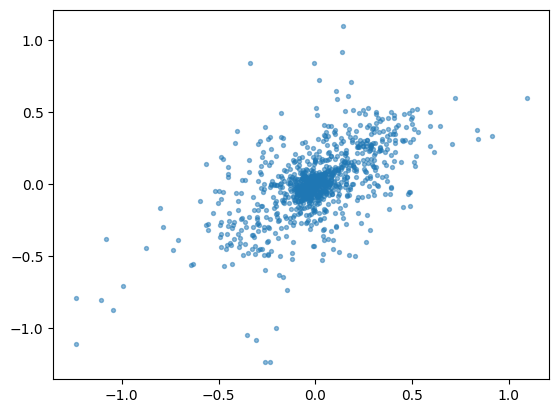

In [21]:
s = 200000
d = 5
plt.scatter(symbol_df['responder_6'].iloc[s+0:s+1000],symbol_df['responder_6'].iloc[s+0+d:s+1000+d],alpha=0.5,s=8)
plt.show()

In [28]:
x = symbol_df.iloc[:1,:]

In [33]:
(x == 0).replace(False,np.nan)

/tmp/ipykernel_8742/2910333370.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  (x == 0).replace(False,np.nan)


,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x

In [34]:
display(symbol_df.iloc[:-1,:])

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,1,0,0,1.749479,NaN,NaN,NaN,NaN,NaN,0.053447,...,-0.385573,-0.022355,0.337951,0.156607,1.406054,3.680800,0.598633,2.337418,2.577889,0.725604
1,1,1,0,1.749479,NaN,NaN,NaN,NaN,NaN,-0.029047,...,-0.302946,-0.434444,0.200921,-0.791932,1.294596,2.638853,-1.767631,2.492198,2.537222,-1.363956
2,1,2,0,1.749479,NaN,NaN,NaN,NaN,NaN,0.017732,...,-0.330820,-0.295700,0.235713,-0.193250,1.294743,2.952363,-0.636602,1.993902,2.234529,-0.620738
3,1,3,0,1.749479,NaN,NaN,NaN,NaN,NaN,0.247528,...,-0.313789,-0.406558,0.358021,-0.161244,1.671854,3.207944,-0.481285,1.864082,2.500172,-0.406635
4,1,4,0,1.749479,NaN,NaN,NaN,NaN,NaN,-0.024495,...,-0.224103,-0.308002,0.261477,-0.123354,2.033962,3.233152,0.071901,2.604931,2.195869,0.290866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468460,1698,962,0,3.743546,2.410067,-1.097348,2.596085,2.361578,0.918163,0.358965,...,-0.112117,1.041909,0.644021,1.136731,0.051629,0.025804,0.291063,-0.035870,0.009992,0.093558
1468461,1698,963,0,3.743546,2.568135,-0.793953,3.069358,2.539425,0.889981,0.319947,...,-0.138405,1.107105,0.535936,0.353802,0.109509,0.042156,0.323018,0.006146,0.026550,0.477519
1468462,1698,964,0,3.743546,2.718452,-0.511277,2.608628,2.033411,0.387283,0.340792,...,-0.122066,1.172237,0.438649,0.497803,-0.096038,-0.040696,0.031934,-0.142388,-0.029059,-0.292828
1468463,1698,965,0,3.743546,2.227324,-1.210031,2.470631,2.569757,0.842342,0.566680,...,-0.087569,0.565139,0.664885,0.083136,-0.198938,-0.050244,-0.077866,-0.236910,-0.080144,-0.500487


In [15]:
# Load your dataset (make sure to replace 'your_dataset.csv' with the actual path)
partition_ids = [2]
df = []
for partition_id in partition_ids:
    input_filepath = path.join('../Data/Raw','train.parquet',f'partition_id={partition_id}')
    df.append(pd.read_parquet(input_filepath))
df = pd.concat(df,axis=0)
df = df[df['symbol_id']==2]
df = df.head(2000)
df['value'] = df['responder_6']
test_df = df.tail(int(len(df)/2))
df = df.head(int(len(df)/2))

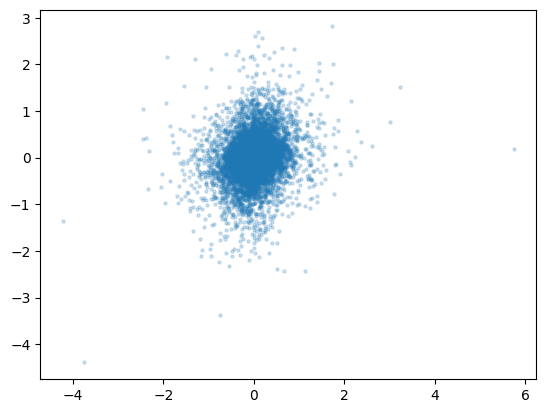

In [39]:
plt.scatter(df[df['symbol_id']==1]['responder_6'].head(10000).diff(),df[df['symbol_id']==7]['responder_6'].head(10000).diff(),alpha=0.2,s=5)
plt.show()

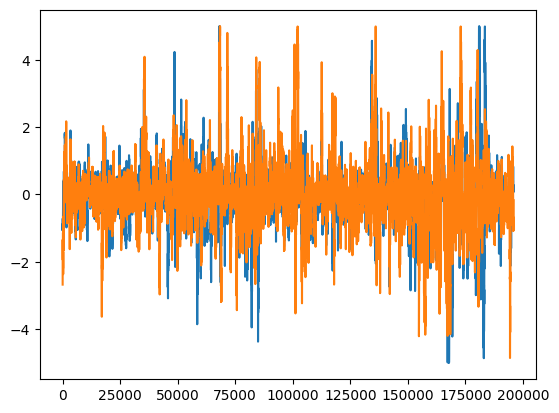

In [35]:
plt.plot(df[df['symbol_id']==1]['responder_6'].head(10000))
plt.plot(df[df['symbol_id']==7]['responder_6'].head(10000))
plt.show()

In [31]:
display(df[df['symbol_id']==1])

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
1,340,0,1,4.090041,-0.156282,0.289095,0.193019,-0.070085,1.140459,-0.528798,...,-0.292850,-0.199408,-0.148638,-0.796567,-0.929294,0.055380,-0.585740,-0.891481,0.184394,-0.402399
21,340,1,1,4.090041,0.171377,0.345134,-0.432643,-0.135934,1.929530,-0.635003,...,-0.387501,-0.293198,-0.104943,-0.432978,-1.086428,0.093715,-0.714377,-1.070021,0.204694,-0.449456
41,340,2,1,4.090041,-0.345780,0.178247,-0.166094,0.003615,2.430599,-0.669415,...,-0.310379,-0.589280,-0.309390,-0.876247,-1.075975,0.021753,-0.798236,-0.776701,0.209985,-0.372865
61,340,3,1,4.090041,-0.420676,0.748536,-0.362878,-0.310556,1.847698,-0.886368,...,-0.312060,-0.350837,-0.105564,-0.310702,-0.862616,0.065706,-0.626890,-0.715017,0.190161,-0.722293
81,340,4,1,4.090041,0.106461,-0.003187,0.149676,-0.072877,2.303100,-0.865133,...,-0.338960,-0.516180,-0.202545,-0.033198,-0.926889,0.013779,-0.409702,-0.885471,0.180005,-0.470228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036733,509,844,1,4.874709,1.170209,0.009663,1.846399,1.206994,-0.957810,0.038068,...,-0.260752,-0.162462,-0.213636,0.102331,-0.090918,-0.057275,0.291922,-0.124004,-0.021720,0.337477
3036761,509,845,1,4.874709,1.180647,-0.698294,1.267480,1.521035,-0.676921,-0.029762,...,-0.267248,-0.084114,-0.192039,-0.014568,-0.055303,-0.039440,-0.143198,-0.134379,-0.022382,-0.221801
3036789,509,846,1,4.874709,1.469629,-0.423734,1.204732,1.333018,-0.790989,-0.028796,...,-0.282588,0.412431,-0.168791,0.498825,-0.046391,-0.025015,-0.059226,-0.091633,-0.013979,-0.248431
3036817,509,847,1,4.874709,1.566141,-0.461444,1.514941,1.252273,-0.093544,-0.002656,...,-0.271263,0.710113,-0.145700,1.010107,-0.050731,-0.047302,-0.404221,-0.129086,-0.063625,-0.401410


In [32]:
display(df[df['symbol_id']==7])

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
4,340,0,7,1.308947,0.321869,0.211620,-0.195385,-0.358547,1.595914,-0.820045,...,-0.284915,2.084096,0.359311,0.511679,-0.377202,0.441480,-0.564688,-2.682818,0.118382,-1.588810
24,340,1,7,1.308947,-0.132483,0.508322,0.028192,-0.160021,1.909478,-0.628541,...,-0.389536,1.597147,0.633639,0.470851,-0.340171,0.393871,-0.549065,-1.346980,0.207821,-1.181836
44,340,2,7,1.308947,-0.389279,0.637479,-0.315409,-0.381818,2.159786,-0.545966,...,-0.326915,2.259552,0.975219,0.790187,-0.034885,0.576711,-0.374965,-2.057438,0.280197,-1.077035
64,340,3,7,1.308947,-0.490444,0.449657,0.056807,0.390051,1.954132,-0.950364,...,-0.345597,1.583939,0.360895,2.564795,-0.010410,0.563065,0.904880,-1.888397,0.526152,-0.591382
84,340,4,7,1.308947,-0.048186,0.599097,-0.107522,-0.165316,2.436337,-1.098162,...,-0.339692,0.196331,-0.081230,0.229409,-1.059138,0.174160,-0.398966,-1.950196,0.246526,-0.903385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036737,509,844,7,2.384929,0.860776,0.125499,1.471576,1.619399,-0.600357,0.026900,...,-0.299265,-0.805577,-0.136189,-0.947852,-1.526988,-0.343293,-0.586950,-0.259765,-0.102281,-0.192821
3036765,509,845,7,2.384929,1.183941,-0.468248,1.338209,1.235035,-0.742281,-0.060441,...,-0.229717,-0.350934,-0.099529,-0.559564,-0.490016,-0.881696,-0.371697,-0.172622,-0.124789,-0.768445
3036793,509,846,7,2.384929,0.957629,-0.223642,1.231869,1.604643,-0.903917,-0.018107,...,-0.254060,-1.510110,-0.121332,-4.644501,-1.379529,-0.533787,-1.245594,-0.238952,-0.050367,-0.513174
3036821,509,847,7,2.384929,1.371603,-0.201657,1.815518,1.401906,-0.840417,-0.002418,...,-0.233904,-1.424015,-0.063921,-3.355719,-1.348844,-0.887927,-1.455010,-0.238409,-0.088106,-0.427056


In [30]:
display(df['symbol_id'].value_counts())

symbol_id
1     144330
7     144330
11    144330
10    144330
9     144330
14    144330
13    144330
12    144330
38    144330
33    144330
30    144330
19    144330
16    144330
34    144330
2     143481
17    142632
3     142632
8     141783
0     129897
15    122256
5      22074
20     22074
22     22074
29     22074
26     22074
36     22074
25     21225
21     20376
23     19527
Name: count, dtype: int64

In [16]:
# df['value'] = np.random.rand(len(df))

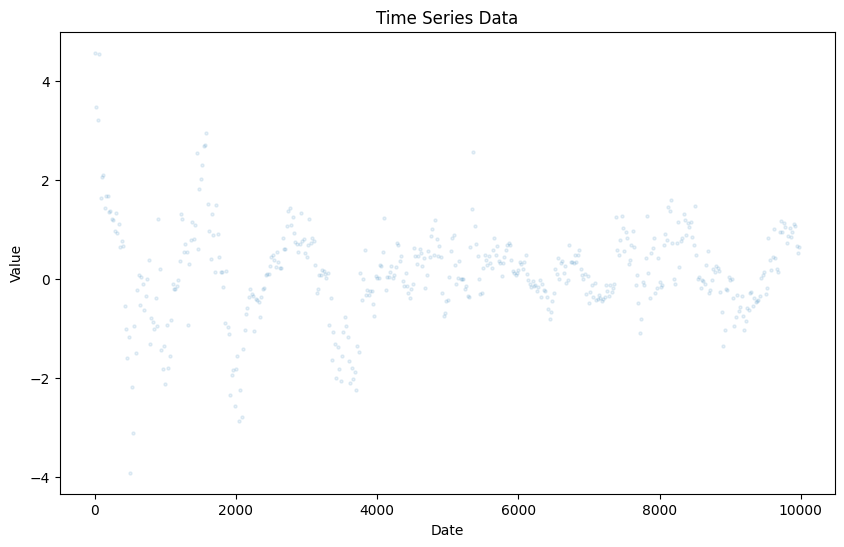

In [17]:
# 1. Explore and visualize the data
# Visualize the time series to see trends, seasonality, or stationarity
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['value'],alpha=0.1,s=5)  # Replace 'value' with the column you're interested in
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [18]:
# 2. Check if the data is stationary
# ARIMA requires the data to be stationary. You can use Augmented Dickey-Fuller test (ADF) to check for stationarity.
from statsmodels.tsa.stattools import adfuller

# Apply the Augmented Dickey-Fuller test
result = adfuller(df['value'].dropna())  # Drop NA values before the test
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is non-stationary and needs to be differenced

ADF Statistic: -6.108402815486087
p-value: 9.46165336593724e-08


In [19]:
# 3. Make the series stationary (if needed)
# Differencing can help to remove trends and make the series stationary.
df['value_diff'] = df['value'].diff().dropna()  # First differencing (remove trend)

# Re-check stationarity after differencing
result_diff = adfuller(df['value_diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

# If p-value < 0.05, the series is now stationary.

ADF Statistic after differencing: -4.243252179627184
p-value after differencing: 0.0005562083627517029


In [7]:
# # 3. Make the series stationary (if needed)
# # Differencing can help to remove trends and make the series stationary.
# x = df['value']
# for i in range(10):
#     x = x.diff().dropna()
#     df[f'value_diff_{i}'] = x
#     plt.figure(figsize=(10, 6))
#     plt.scatter(x.index,x,alpha=0.1,s=5)  # Replace 'value' with the column you're interested in
#     plt.title('Time Series Data')
#     plt.xlabel('Date')
#     plt.ylabel('Value')
#     plt.show()
#     # Re-check stationarity after differencing
#     result_diff = adfuller(x)
#     print('ADF Statistic after differencing:', result_diff[0])
#     print('p-value after differencing:', result_diff[1])
    
#     # If p-value < 0.05, the series is now stationary.

<Figure size 1200x600 with 0 Axes>

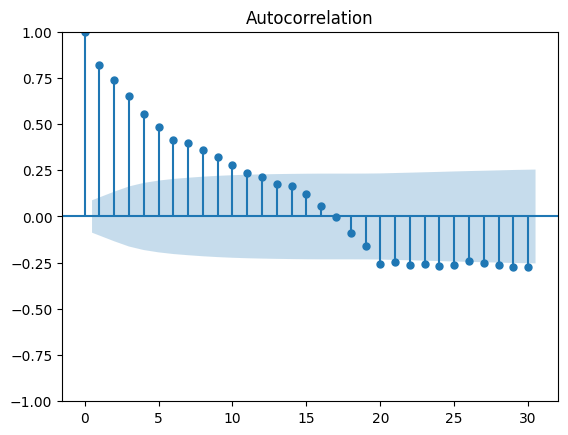

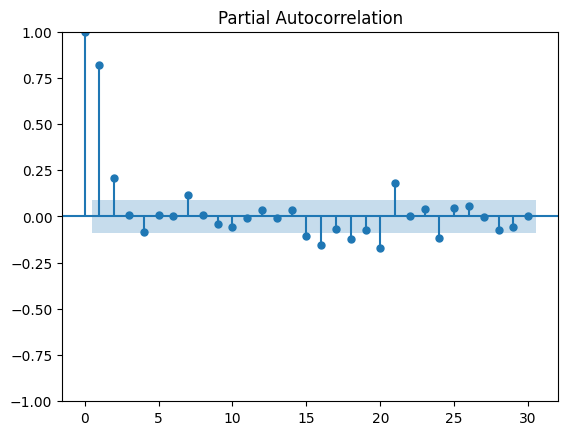

In [20]:
# 4. Identify the order of ARIMA(p, d, q)
# Use autocorrelation (ACF) and partial autocorrelation (PACF) plots to identify p (AR) and q (MA)
plt.figure(figsize=(12, 6))

# ACF plot - used to determine q (MA order)
plot_acf(df['value'].dropna(), lags=30)
plt.show()

# PACF plot - used to determine p (AR order)
plot_pacf(df['value'].dropna(), lags=30)
plt.show()

# Based on these plots, you can manually choose p and q.
# For example, assume p=1 and q=1 for simplicity (you should refine this through the plots).

In [21]:
# 5. Fit the ARIMA model
# Now we will fit an ARIMA model using the identified order (p, d, q)
# For this example, we are using ARIMA(1, 1, 1) model
model = ARIMA(df['value'], exog=df.loc[:,df.columns.str.startswith('feature')].fillna(0), order=(4, 1, 18))  # ARIMA(p, d, q) where p=1, d=1, q=1
fitted_model = model.fit()

/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/s

In [14]:
# 6. Check the model summary
# This gives you detailed information about the fitted model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  500
Model:                ARIMA(4, 1, 18)   Log Likelihood                  66.963
Date:                Mon, 23 Dec 2024   AIC                             70.073
Time:                        21:45:07   BIC                            499.759
Sample:                             0   HQIC                           238.696
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature_00    -0.0096      0.036     -0.265      0.791      -0.080       0.061
feature_01     0.0562      0.035      1.619      0.106      -0.012       0.124
feature_02     0.0050      0.039      0.126      0.8

In [22]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  500
Model:                ARIMA(4, 1, 18)   Log Likelihood                -178.975
Date:                Mon, 23 Dec 2024   AIC                            561.950
Time:                        21:47:24   BIC                            991.636
Sample:                             0   HQIC                           730.572
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature_00    -0.1238      0.053     -2.325      0.020      -0.228      -0.019
feature_01     0.1845      0.056      3.279      0.001       0.074       0.295
feature_02    -0.1206      0.052     -2.306      0.0

/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


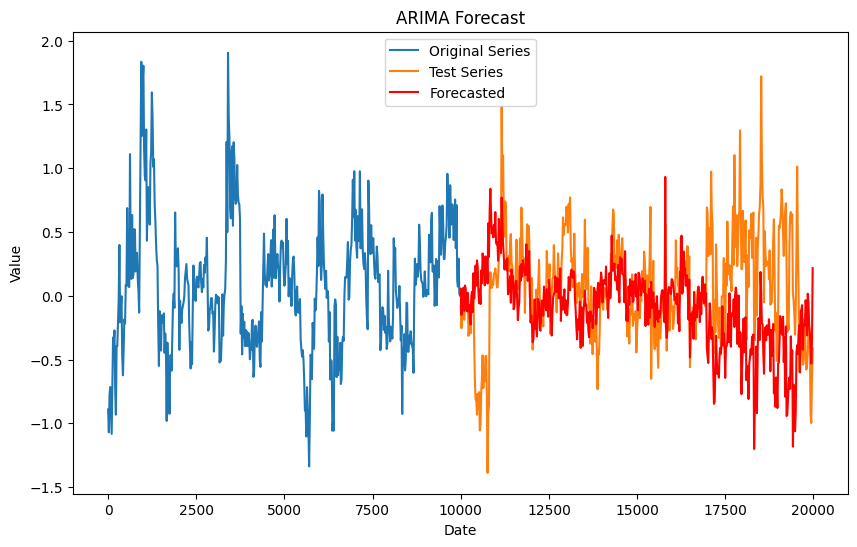

In [11]:
# 7. Forecasting using the ARIMA model
# Let's forecast future values (e.g., the next 10 periods)
forecast = fitted_model.forecast(steps=len(test_df),exog=test_df.loc[:,test_df.columns.str.startswith('feature')].fillna(0))
test_df['forecast'] = forecast.values

# Plot the forecasted values along with the original series
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Original Series')
plt.plot(test_df['value'], label='Test Series')
plt.plot(test_df['forecast'], label='Forecasted', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


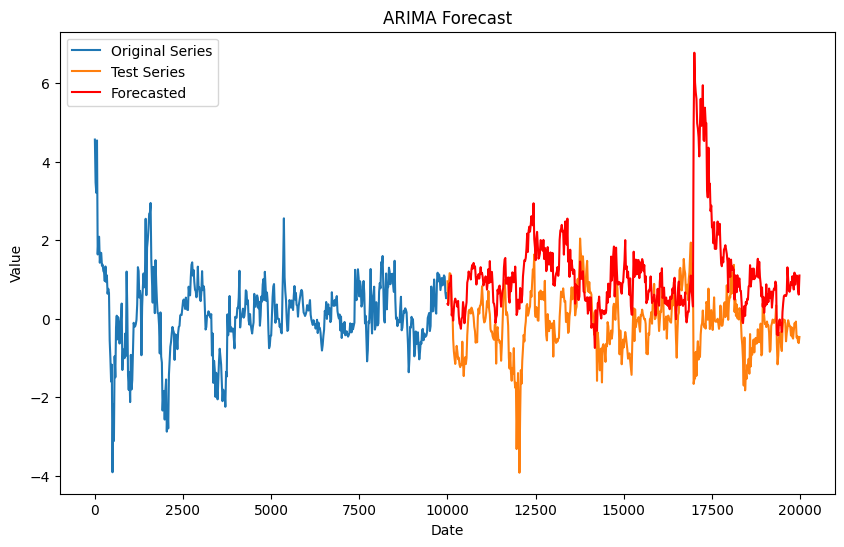

In [23]:
# 7. Forecasting using the ARIMA model
# Let's forecast future values (e.g., the next 10 periods)
forecast = fitted_model.forecast(steps=len(test_df),exog=test_df.loc[:,test_df.columns.str.startswith('feature')].fillna(0))
test_df['forecast'] = forecast.values

# Plot the forecasted values along with the original series
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Original Series')
plt.plot(test_df['value'], label='Test Series')
plt.plot(test_df['forecast'], label='Forecasted', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

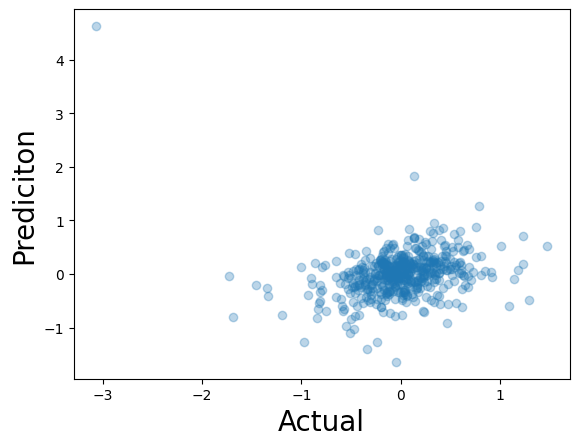

In [24]:
plt.scatter(test_df['value'].diff(), test_df['forecast'].diff(),alpha=0.3)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Prediciton',fontsize=20)
plt.show()

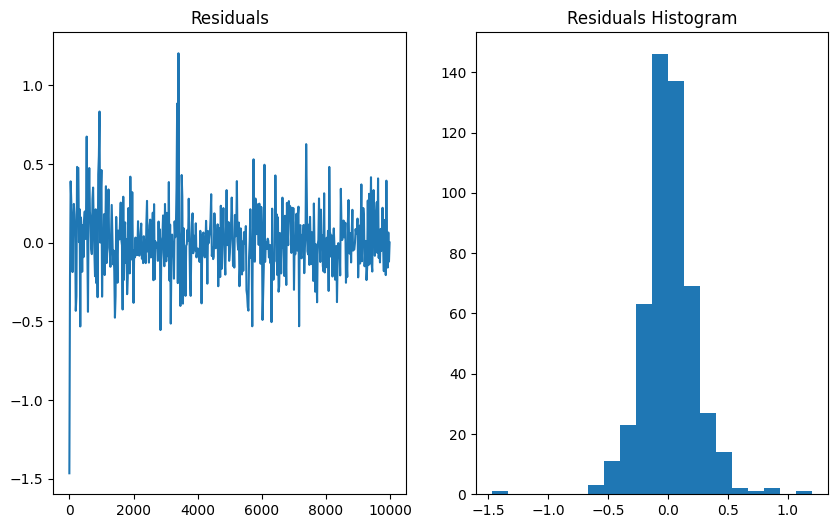

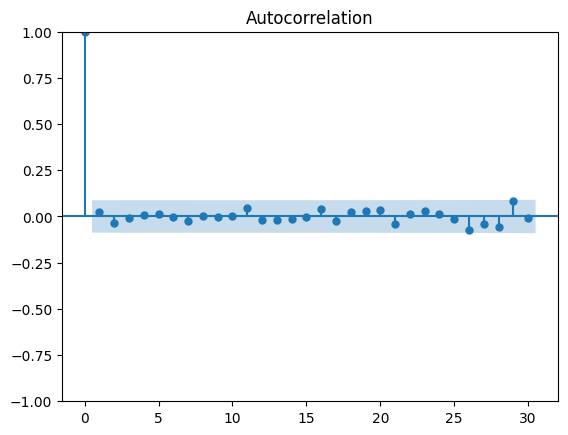

In [13]:
# 8. Diagnostic Check
# Check the residuals of the model to ensure they resemble white noise
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')

# Histogram of residuals
plt.subplot(122)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.show()

# Also, use ACF plot of residuals to check for autocorrelation
plot_acf(residuals, lags=30)
plt.show()

# If the residuals behave like white noise, the model is a good fit.